<a href="https://colab.research.google.com/github/manishankarksaw15/Play-store-analysis/blob/main/playstore_app_review_analysis_by_manishankar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

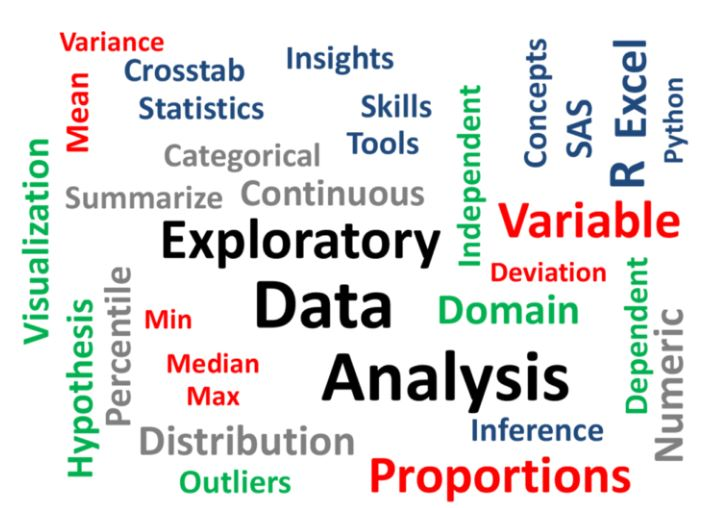

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **DATA PREPARATION**

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import date

# **Mounting the drive**





In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading and reading the csv file.**

In [ ]:
#creating data files path and reading the csv files
playstoreData_path = '/content/drive/MyDrive/project_work_app_analysis/Play Store Data.csv'
playstore_df = pd.read_csv(playstoreData_path)
userReviews_path = '/content/drive/MyDrive/project_work_app_analysis/User Reviews.csv'
userReviews_df = pd.read_csv(userReviews_path)

# **Fetching first 20 data form the given dataset.**





In [ ]:
# Display the Play Store App data
playstore_df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# **Fetching the bottom most 20 data.**

In [ ]:
# Display the Play Store App data
playstore_df.tail(370)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# **Getting out the information from the data set.**

In [ ]:
#viewing playstore dataframe
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **A. INFERENCE**

This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:

 **App Category**: Category of the app. This could be beauty, business,        entertainment, education...etc.

**Rating**: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Reviews**: The number of user reviews each app has received.

**Size**: The memory size needed to install the application.

**Installs**: The number of times each application has been installed by users.

**Type**: Whether the app is free or a paid app.

**Price**: The price of the app.

**Content Rating**: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

**Genres**: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

**Last Updated**: Release date of the most recent update for the app.

**Current Ver**: The app's current version.

**Android Ver**: The oldest version of Android OS supported by the app.






# **Finding out the mean numerical value present in the dataset.**

In [ ]:
#viewing the available numeric column details
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **INFERENCE**
We found that -

  count	9367.000000

  mean	4.193338

std	0.537431

min	1.000000

25%	4.000000

50%	4.300000

75%	4.500000

max	19.000000

In [ ]:
#viewing the columns name
print(playstore_df.columns)
print(playstore_df.shape)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
(10841, 13)


# **DATA CLEANING**

**FINDING OUT THE MISSING VALUE**

In [ ]:
print (f"Missing Values"+"\n" + "-"*20)

#sum of null values per column
playstore_df.isnull().sum()

Missing Values
--------------------


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**INFERENCE**


*  The **Rating** have 1474 missing value or NaN value which is the maximum number of the missing value in this data set.
*  **Type** and **Content Rating** have one missing value or NaN value, whereas **Current ver and Android ver** have 8 and 3 missing value respectively.



In [ ]:
df = playstore_df.sort_values(by="Installs", ascending=False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device


# **INFERENCE**

*    "Life Made WI-Fi Touchscreen Photo Frame" is listed in Top, but is not a result of a huge amount of installs. 
This is probably due to an error in data entry. 

*   This is probably due to an error in data entry. 

* So we need to drop it.  









In [ ]:
#The row 10472 is having mixed data so it should be dropped out.
#playstore_df.drop([10472], inplace = True)
df.drop([10472], inplace = True)


In [ ]:
df.shape

(10840, 13)

In [ ]:
# Removing null values in Rating column
print(df.shape)
df.dropna(how='any',subset=["Rating"],axis=0,inplace=True)

print(df.shape)

(10840, 13)
(9366, 13)


In [ ]:
# After dropping the null value , checking the presen
df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [ ]:
# lets analyze other null values ie. "Current Ver" & "Android Ver"
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN


In [ ]:
# Finding out the null value present in the "Current ver"
df.loc[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up


In [ ]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

In [ ]:
df.loc[[6322,4453]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


In [ ]:
# Checking out the shape after performing cleaning of carbage.
df.shape


(9366, 13)

**Till now we have deal with all the null or NaN value present in the given data set. And we are left with 9366 row and 13 columns.**

# **DATA CORRECTION**

*   Changing of the object type to the float of integer type.

The three features that we will be working with most frequently henceforth are Installs, Size, and Price.

A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. 

Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.




In [ ]:
#  remove $ sign in Price column
df["Price"] = df["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

# Removing Row of 'Everyone' in Price Column
df.drop(labels=df[df['Price'] == 'Everyone'].index, inplace = True)

# Converting into Float
df["Price"] = df["Price"].apply(lambda x: float(x))

In [ ]:
df['Price'].unique()

array([  0.  ,   3.99,   1.99,   2.99,   0.99,   2.49,   5.99,   4.99,
         1.49,  17.99,   4.49,   2.  ,   3.49,  15.99,   8.99,  29.99,
       399.99,   9.99,  11.99,  19.99,   4.77,   1.75,   1.76,  14.99,
         6.99,   1.  ,   4.6 ,   3.95,   7.99,  24.99,   2.9 ,  13.99,
         9.  ,  14.  ,  12.99,  39.99,   4.59,   3.02,   6.49,   3.88,
         1.2 ,  16.99,   1.97,   5.49,  10.  ,   3.28,   2.95,   1.59,
       400.  ,   3.9 ,   2.5 ,   2.59,  18.99, 389.99, 299.99,   3.04,
        19.4 ,  15.46,   8.49,   1.7 ,  79.99,  33.99,   1.5 ,   7.49,
        10.99,   4.29,   3.08,   1.29,   1.61,  37.99, 379.99,   4.84,
         2.56])

In [ ]:
# Removing "+" & "," in Install column
df['Installs'] = df['Installs'].apply(lambda x:x.replace("+","").replace(",","").strip() if "+" in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x:int(x))

In [ ]:
df['Installs'].unique()

array([ 500000000,     500000,        500,   50000000,      50000,
               50,    5000000,       5000,          5,  100000000,
           100000,        100,   10000000,      10000,         10,
       1000000000,    1000000,       1000,          1])

In [ ]:
# Convert all other identified columns to numeric
df['Reviews'] = df['Reviews'].astype('int')

In [ ]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace("M","").replace(",", "").replace("+", "").strip() if "M" in str(x) else x)

# Converting kb into Mb
df['Size'] = df['Size'].apply(lambda x:float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)


# Removing Row of 'Varies with device' in Price Column
df.drop(labels=df[df['Size'] == 'Varies with device'].index, inplace = True)

# Converting into Float
df['Size'] = df["Size"].astype(float)

In [ ]:
#Checking out the type of the size.
df['Size'].dtype

dtype('float64')

In [ ]:
# Finding out all unique value in size
df['Size'].unique()

array([4.00000000e+01, 1.10000000e+01, 7.40000000e+01, 6.20000000e+01,
       7.00000000e+01, 2.40000000e+01, 6.10000000e+01, 1.70000000e+01,
       1.30000000e+01, 5.20000000e+01, 1.90000000e+01, 5.00000000e+00,
       6.40000000e+00, 2.20000000e+01, 2.80000000e+00, 2.60000000e+00,
       8.10000000e+01, 1.50000000e+00, 5.90000000e+01, 3.60000000e+01,
       3.10000000e+01, 4.40000000e+01, 3.90000000e+01, 6.20000000e+00,
       1.80000000e+01, 2.10000000e+01, 3.30000000e+00, 2.30000000e+01,
       3.50000000e+01, 3.70000000e+01, 6.90000000e+00, 5.10000000e+00,
       1.20000000e+01, 6.40625000e-01, 4.60000000e+00, 3.80000000e+01,
       5.70000000e+00, 1.60000000e+01, 7.03125000e-02, 5.50000000e+01,
       3.00000000e+01, 2.00000000e+01, 6.10000000e+00, 4.60000000e+01,
       4.80000000e+00, 7.80000000e+01, 1.00000000e+01, 8.60000000e+00,
       8.70000000e+01, 1.10000000e+00, 5.80000000e+01, 5.30000000e+01,
       6.50000000e+00, 2.60000000e+01, 9.50000000e+00, 2.50000000e+01,
      

**Checking the average rating, it should varies from 1 to 5. If there is any value out of this range should be droped.**

In [ ]:
# Drop any such record 

df.loc[df['Rating'] < 1]  & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Review should not be more than the installed app.**

In [ ]:
df.loc[df['Rating'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [ ]:
# Removing those values
temp_data = df.loc[df['Rating'] > df['Installs']].index

df.drop(labels=temp_data,inplace=True)

In [ ]:
df.loc[df['Rating'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Retriving out final shape of the playstore app dataset.
df.shape

(7726, 13)

# **After performing the data cleaning process we got 7726 rows and 13 columns. Now we will use this data for the data visulation.**

### **DATA VISUALIZATION**

# We have carried out this section with the help of the two important libraries of the  of the python ie. **Matplotlib** and **Seaborn**.

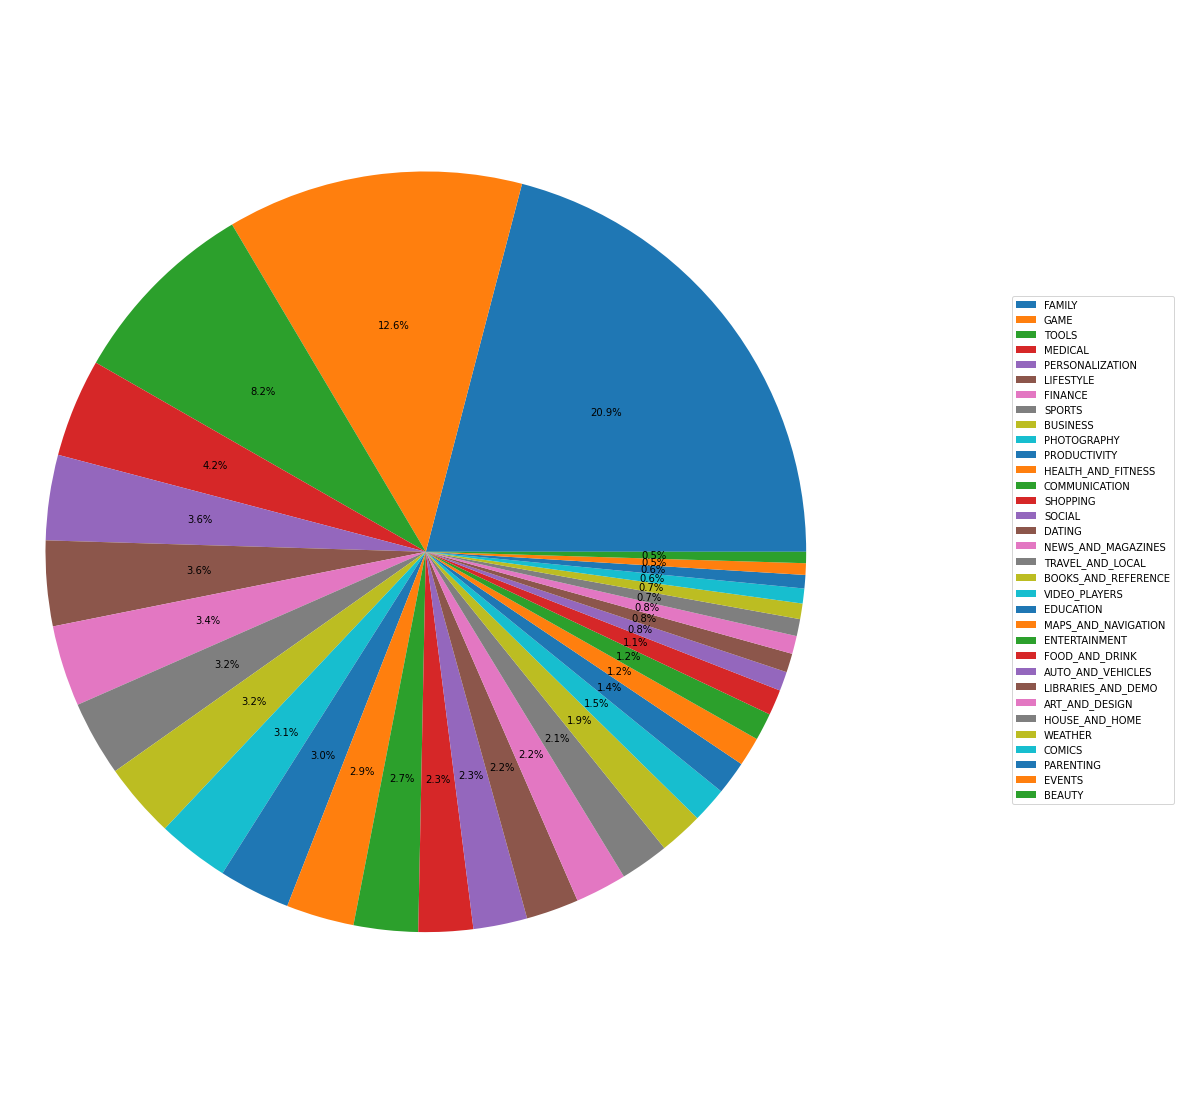

In [ ]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(15, 20), subplot_kw=dict(aspect="equal"))

number_of_apps = df['Category'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

# **INSIGHT**
Family, Game, Tools Medical are the top categories app.

In [ ]:
# Writing the function for fetching the value of the categories value count.
x = df['Category'].value_counts()
y = df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

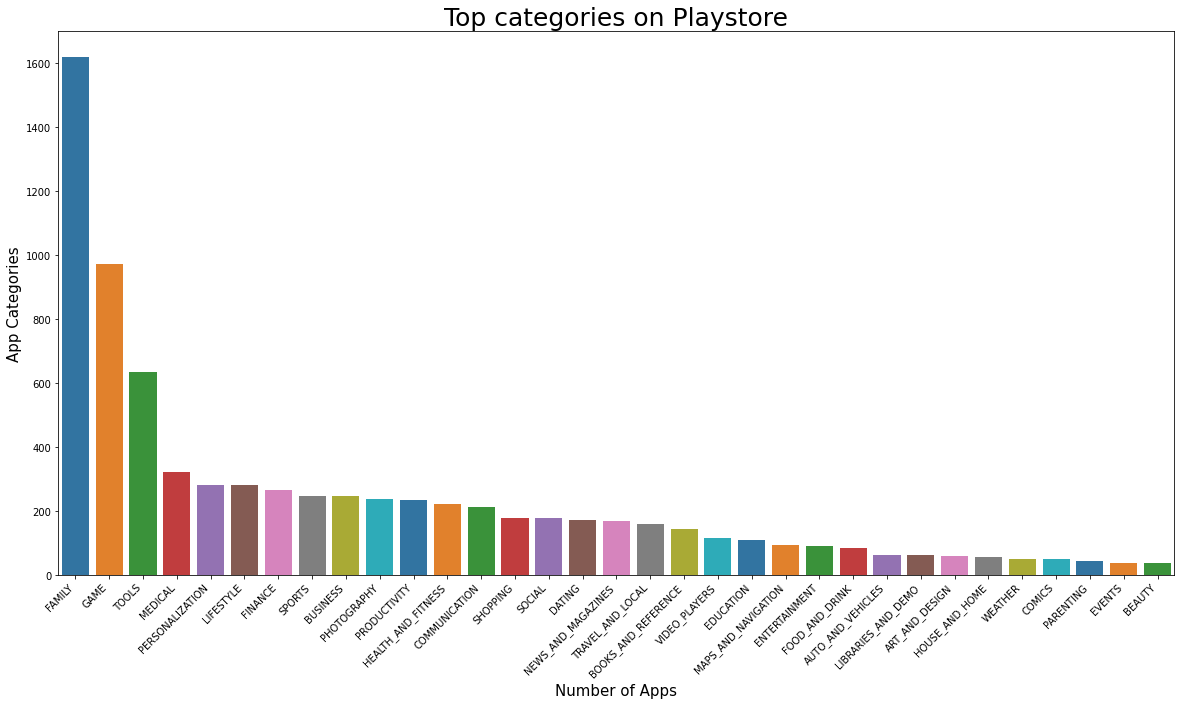

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

# **This graph shows the number of apps present on the various categories.**
**Family categories has maximum apps.**

Text(0.5, 1.0, 'Total app installs in each category')

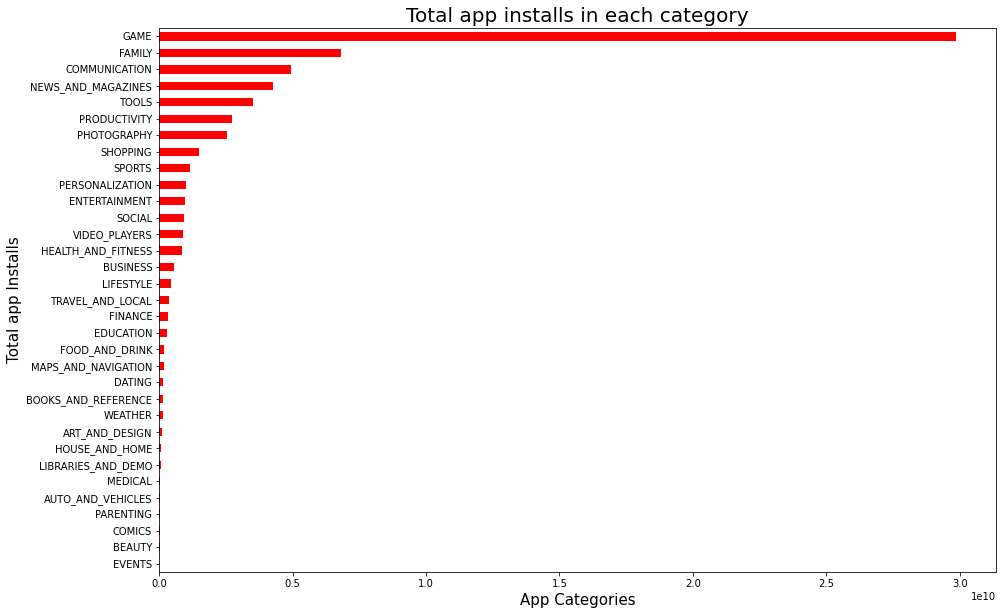

In [ ]:
# total app installs in each category of the play store

a =df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'r', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

# **Outcome of graph**
**This gives the total number of app installed in each catogories.**

Game has the maximum number of installation, followed by family related app.

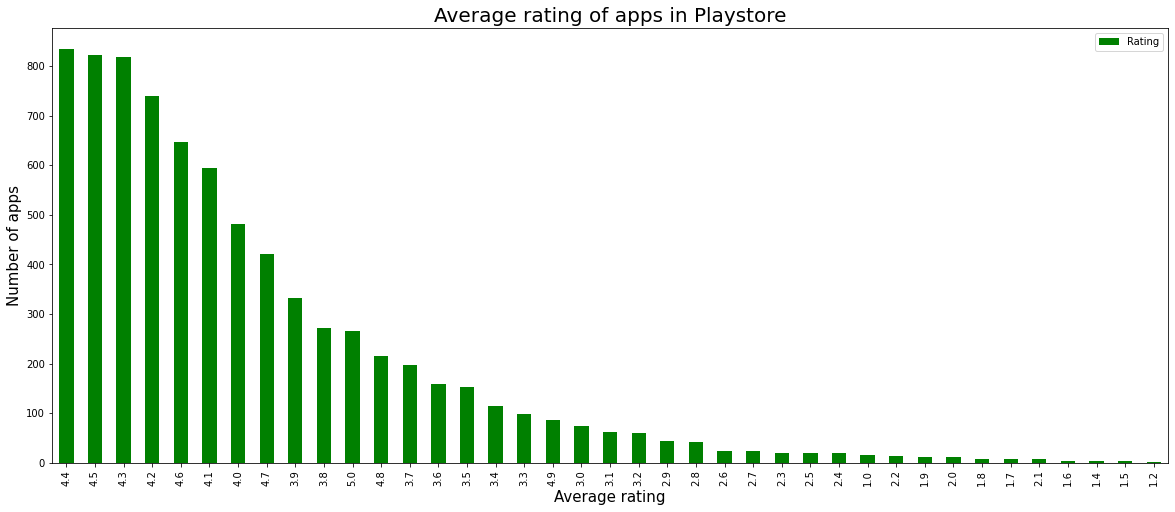

In [ ]:
# Average app ratings

df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'g' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

# **Outcomes of the gaph.**
**This graph represent the no of apps vs Rating.**

**So, from her we can conclude that most of the app are rated as 4.4.**

**The rating of the varies from 1.0 to 5.0.**

In [ ]:
def findtop3incategory(str):
    str = str.upper()
    top3 = df[df['Category'] == str]
    top3apps = top3.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 3 Installed Apps',size = 20)  
    graph = sns.barplot(x = top3apps.App, y = top3apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

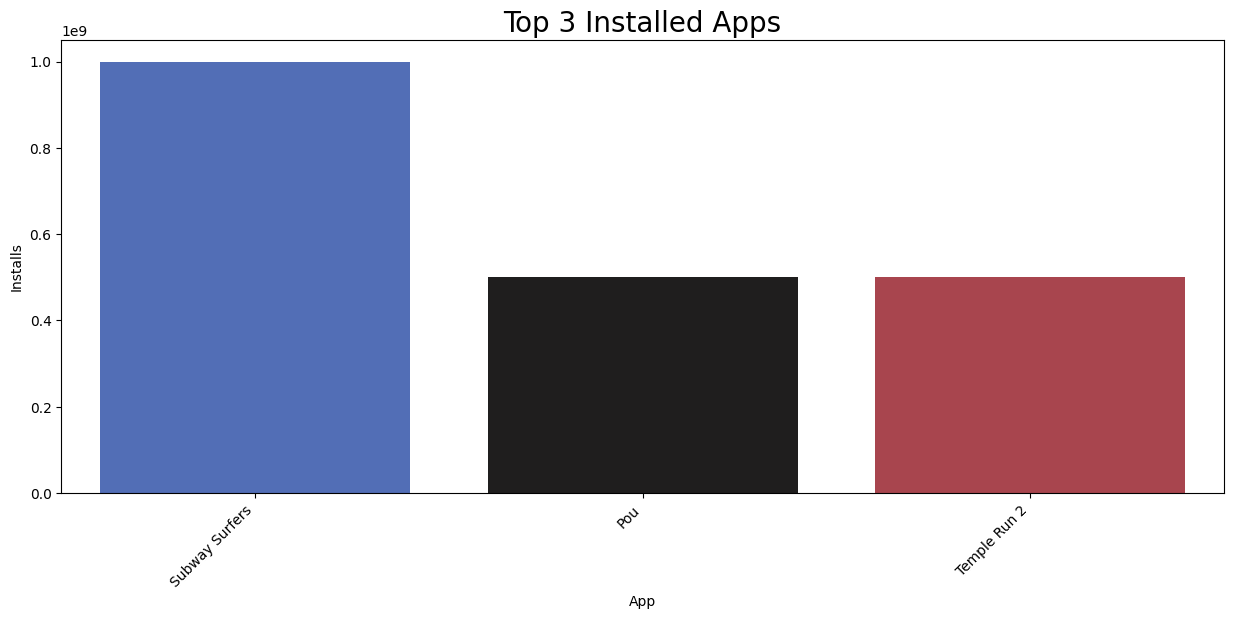

In [ ]:
findtop3incategory('GAME')

# **INFERENCE**
**This graph depict the top 3 installed app by the user.**

**The top 3 apps which were prefered by the user are- Subway Surfers, Pou, Temple Run 2.**


# **Top apps that are of free type.**

In [ ]:
 # Creating a df for only free apps
 
free_df = df[df['Type'] == 'Free']

In [ ]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
1917,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [ ]:
# Top free apps

top_free_df['App']

3896    Subway Surfers
3736       Google News
3765       Google News
9844       Google News
3816       Google News
1917    Subway Surfers
1654    Subway Surfers
1750    Subway Surfers
1700    Subway Surfers
1872    Subway Surfers
Name: App, dtype: object

In [ ]:
top_free_df['Category'].value_counts()

GAME                  6
NEWS_AND_MAGAZINES    4
Name: Category, dtype: int64

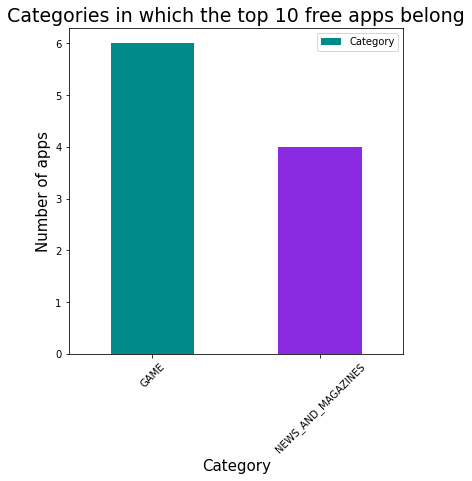

In [ ]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(6,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 10 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

# **INFERENCE**
**In this graph we have compared the categories in which top 10  free apps were installed.**

# **Top apps that are of paid type.**

In [ ]:
# Creating a df containing only paid apps
paid_df=df[df['Type']=='Paid']

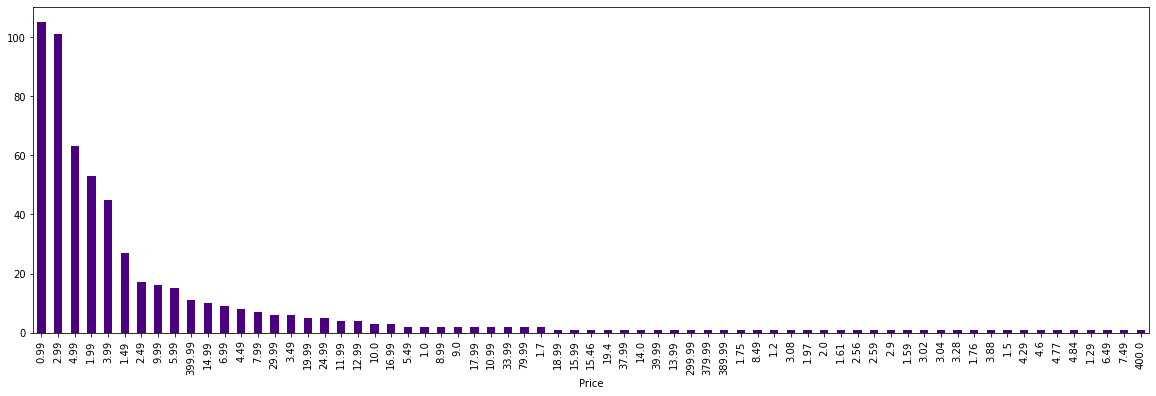

In [ ]:
# Number of apps that can be installed at a particular price 

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'indigo')

# * The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
# * There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
# * In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
# * Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
# * This is given by:

## Revenue generated through installs = (Number of installs)x(Price to install the app)


In [ ]:
# Creatng a new column 'Revenue' in paid_df
df['Revenue'] = df['Installs']*df['Price']
df.tail(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
8323,DF@realtime,BUSINESS,4.3,24,8.000000,1000,Free,0.00,Everyone,Business,"October 26, 2017",6.0.8.2.GM,3.2 and up,0.0
9869,YouCamp EU,TRAVEL_AND_LOCAL,3.4,39,32.000000,1000,Paid,2.56,Everyone,Travel & Local,"July 20, 2013",1.3.1,2.2 and up,2560.0
4545,Learn R - Programming Concepts,FAMILY,3.5,6,2.900000,1000,Free,0.00,Everyone,Education,"April 25, 2017",1.0.1,4.0.3 and up,0.0
9871,Flag of European Union,PERSONALIZATION,4.2,36,5.300000,1000,Free,0.00,Everyone,Personalization,"December 10, 2016",2.0,2.3.3 and up,0.0
8365,DG Smart life,TOOLS,2.1,14,28.000000,1000,Free,0.00,Everyone,Tools,"September 7, 2017",1.0.5,4.1 and up,0.0
5365,i am rich,BUSINESS,3.9,213,2.900000,1000,Free,0.00,Everyone,Business,"June 9, 2018",1.0,4.0 and up,0.0
6929,Color Changer Pro [root],PERSONALIZATION,4.5,69,0.928711,1000,Paid,0.99,Everyone,Personalization,"January 12, 2017",1.11,4.4 and up,990.0
4530,Run R Script - Online Statistical Data Analysis,FAMILY,3.9,8,6.200000,1000,Free,0.00,Everyone,Education,"April 4, 2018",1.1 Build 226,2.2 and up,0.0
6247,BH Mail,COMMUNICATION,3.4,7,6.000000,1000,Free,0.00,Everyone,Communication,"April 3, 2018",5.403,4.0.3 and up,0.0
9873,Flag Of European Union LWP,PERSONALIZATION,4.3,88,4.200000,1000,Free,0.00,Everyone,Personalization,"January 24, 2018",7.0,4.0.3 and up,0.0


In [ ]:
# Top app in the paid category

df[df['Revenue'] == df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0


# **This shows that "I am rich " app has the highest revenue earning.**
**So people are more intrested in Lifestyle catogeries.**

In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
5578          Sleep as Android Unlock
2883              Facetune - For Free
2912              Facetune - For Free
2950              Facetune - For Free
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
Name: App, dtype: object

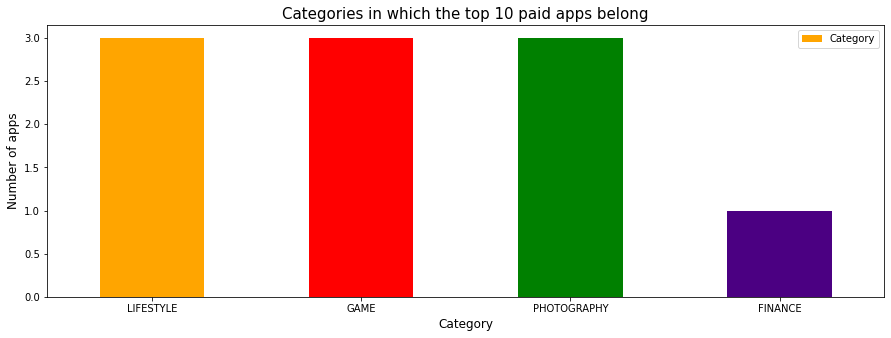

In [ ]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "indigo", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

# **Inference**
**Form this we can conclude that Lifestyle games photoghraphy and Finance categories lies in top 10 paid app.**

## **Data Visualization on User Reviews:**

**1). Percentage of Review Sentiments**

In [ ]:
userReviews_path = '/content/drive/MyDrive/project_work_app_analysis/User Reviews.csv'
userReviews_df = pd.read_csv(userReviews_path)

In [ ]:
# Basic inspection
ur_df=userReviews_df

In [ ]:
# Basic inspection
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


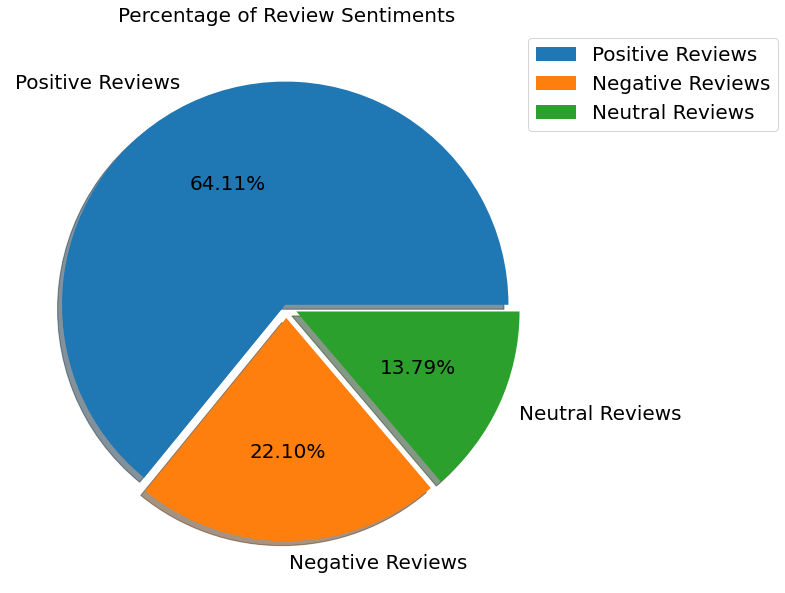

In [ ]:

import matplotlib
counts = list(ur_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

# **Findings:**

**Positive reviews** are 64.30%

**Negative reviews** are 22.80%

**Neutral reviews** are 12.90%


In [ ]:
# positive reviews
positive_ur_df=ur_df[ur_df['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


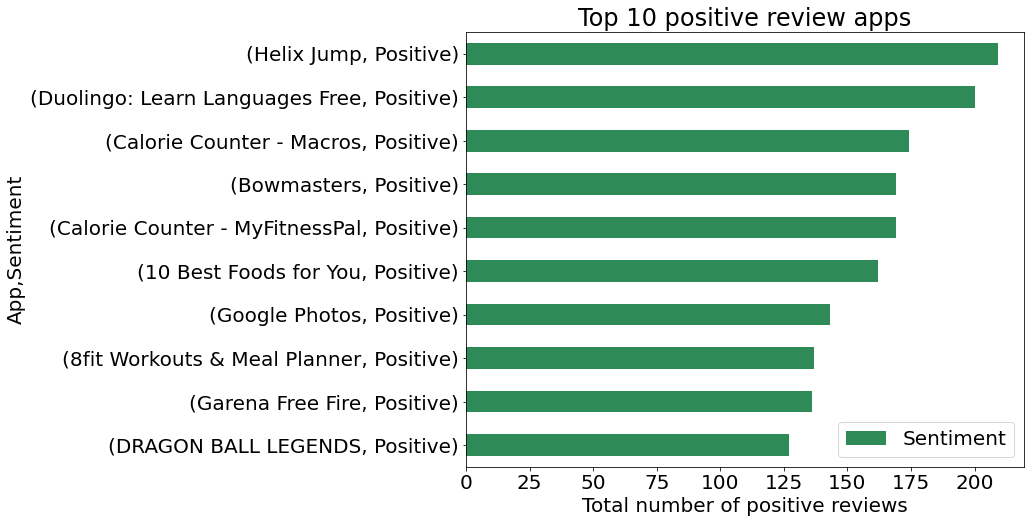

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

# **Findings -**
**We can see that the total number of positive reviews is maximum for Helix jump.**

In [ ]:
negative_ur_df=ur_df[ur_df['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


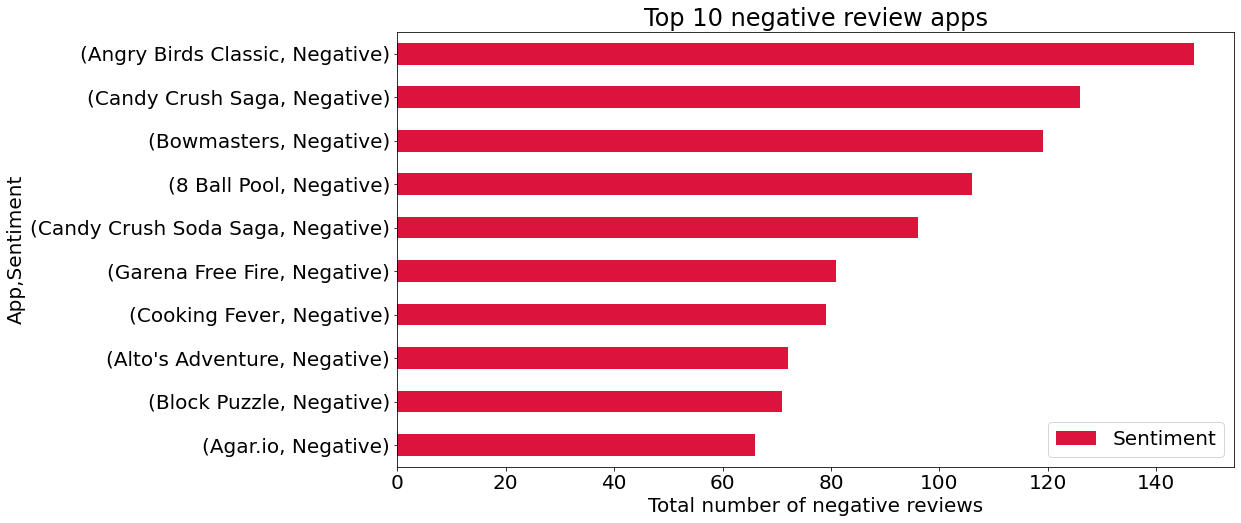

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

# **Findings -**
**We can see that the total number of negative reviews is maximum for Angry bird classic.**

# **▶Analysis Summary**
In this project of analyzing play store applications, we have worked on several parameters which would help App Industries to do well in launching their apps on the play store.

*In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

*APP industry needs to focus more on:

*Developing apps related to the least categories as they are not explored much. 



*Most of the apps are Free, so focusing on free app is more important.

*Focusing more on content available for Everyone will increase the chances of getting the highest installs.

*They need to focus on updating their apps regularly, so that it will attract more users.

*They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.
Percentage of free apps = ~92%

*Percentage of apps with no age restrictions = ~82%
Most competitive category: Family

*Category with the highest average app installs: Game
Percentage of apps that are top rated = ~80%

*Family, Game and Tools are top three categories having 1906, 926 and 829 app count.






# **Conclusion**
Through exploratory data analysis we have observed some trends and have made some assumptions that might lead to app success among the users in the play store.

 * The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.

* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.

* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.

* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

* This is given by:

## Revenue generated through installs = (Number of installs)x(Price to install the app)

**We can see that the total number of positive reviews is maximum for Helix jump.**

**We can see that the total number of negative reviews is maximum for Angry bird classic.**
